## Imports ##

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

## Functions ##

In [2]:
def plot(image):
    plt.imshow(image,cmap='gray', vmin=0, vmax=255)
    plt.axis('off')  # Turn off axis

In [3]:
def check_mirror(image):
    if image[0, 0] == 0:
        image = cv2.bitwise_not(image)
    return image

In [4]:
# Find roation of the image and rotate it to be straight on a white background
def check_rotation(image):
    angle = find_angle(image)
    M = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), angle, 1)
    image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]), borderValue=255)
    return image

In [5]:
# find the angle of rotation of the qr code, it may be slightly tilted
def find_angle(image):
    edges = cv2.Canny(image, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
    angle = 0
    if lines is not None:
        for line in lines:
            for rho, theta in line:
                if np.pi / 4 < theta < 3 * np.pi / 4:
                    angle = np.rad2deg(theta - np.pi / 2)
    return angle

In [6]:
# Export processed image into a file in test_outputs folder
def export_image(image, path):
    cv2.imwrite(path, image)

In [7]:
def fata7i_ya_warda(image, structuring_element_size, iterations=1):
    se_rect = cv2.getStructuringElement(cv2.MORPH_RECT, structuring_element_size)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, se_rect, iterations=iterations)

In [8]:
def afeli_ya_warda(image, structuring_element_size, iterations=1):
    se_rect = cv2.getStructuringElement(cv2.MORPH_RECT, structuring_element_size)
    return cv2.morphologyEx(image, cv2.MORPH_CLOSE, se_rect, iterations=iterations)

In [9]:
def sharpen(image, iterations=1):
    temp_image = image
    
    kernel = np.array([[0,-1,0],
                       [-1,5,-1],
                       [0,-1,0]])
    
    for _ in range(iterations):
        temp_image = cv2.filter2D(temp_image, -1, kernel=kernel)

    return temp_image

In [10]:
def more_black(image, structuring_element_size, iterations=1):
    se_rect = cv2.getStructuringElement(cv2.MORPH_RECT, structuring_element_size)
    return cv2.erode(image, se_rect, iterations=iterations)

In [11]:
def more_white(image, structuring_element_size, iterations=1):
    se_rect = cv2.getStructuringElement(cv2.MORPH_RECT, structuring_element_size)
    return cv2.dilate(image, se_rect, iterations=iterations)

In [12]:
def calculate_shift(image):
    counts_until_first_black_pixel = []
    current_counter = 0
    index = 0
    for row in image:
        while  index < len(row) and row[index] != 0:
            current_counter += 1
            index += 1
        index = 0
        if current_counter == len(row):
            counts_until_first_black_pixel.append(-1)
            
        else:
            counts_until_first_black_pixel.append(current_counter) 

        current_counter = 0
    return counts_until_first_black_pixel

In [13]:
def notch_reject_filter(shape, d0=9, u_k=0, v_k=0):
    P, Q = shape
    H = np.zeros((P, Q))

    for u in range(0, P):
        for v in range(0, Q):
            D_uv = np.sqrt((u - P / 2 + u_k) ** 2 + (v - Q / 2 + v_k) ** 2)
            D_muv = np.sqrt((u - P / 2 - u_k) ** 2 + (v - Q / 2 - v_k) ** 2)

            if D_uv <= d0 or D_muv <= d0:
                H[u, v] = 0.0
            else:
                H[u, v] = 1.0

    return H

In [273]:
def e7seb_shift(accepted_difference: int, pixel_count: list) -> list:
    regions_array = []
    lower_bound = 0
    for i in range(1, len(pixel_count)):
        if pixel_count[i] == -1 and lower_bound != 0:
            regions_array.append((lower_bound, i))
            lower_bound = i
            
        if abs(pixel_count[i] - pixel_count[i - 1]) <= accepted_difference:
            continue
        regions_array.append((lower_bound, i))
        lower_bound = i



    return regions_array

In [244]:
def za7za7ni(image, regions, pixel_count):
    from copy import deepcopy
    image_5_thresholded_shifted = deepcopy(image)
    for region in regions:
        minimum = min(pixel_count[region[0]:region[1]])
        for row in range(*region):
            if pixel_count[row] == -1 or pixel_count[row] == minimum:
                continue
            if pixel_count[row] - minimum < 0:
                image_5_thresholded_shifted[row] = np.roll(image_5_thresholded_shifted[row], (pixel_count[row] - minimum))
            elif pixel_count[row] - minimum > 0:
                image_5_thresholded_shifted[row] = np.roll(image_5_thresholded_shifted[row], -(pixel_count[row] - minimum))

    return image_5_thresholded_shifted

## Images ##

In [122]:
images = []

for image in os.listdir("./test-cases"):
    images.append(cv2.cvtColor(cv2.imread("./test-cases/" + image), cv2.COLOR_BGR2GRAY))
    
plt.style.use({'figure.facecolor': 'white'})

### Image 1 ###

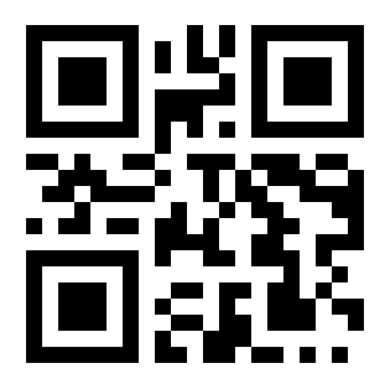

In [15]:
image = images[0]
plot(image)

for comparison with shifted image

In [16]:
calculate_shift(image)

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,


In [17]:
export_image(image, "./test_outputs/image1.jpg")

Issue: None
Solution: Not needed
Status: Success
Text: 01-Good job!

### Image 2 ###

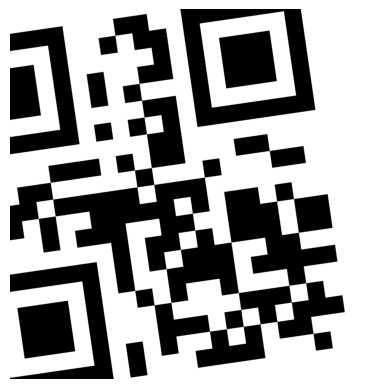

In [18]:
image = images[1]
plot(image)

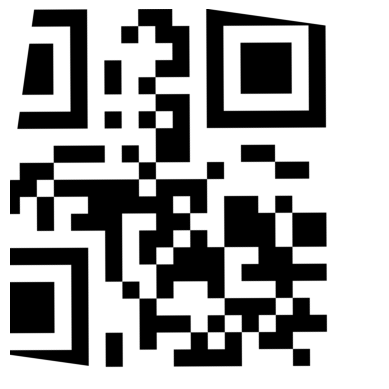

In [19]:
image = check_rotation(image)
plot(image)

In [20]:
export_image(image, "./test_outputs/image2.jpg")

Issue: Square rotated and trimmed
Solution: check rotation angle and rotate, the image should be shifted to have the squares in the corners 40 pixels away from the borders
Status: Fail
Text: 02-Matsawar-3edel

### Image 3 ###

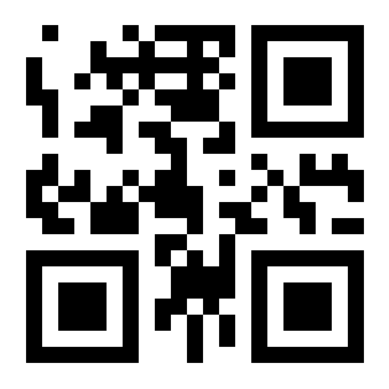

In [21]:
image = images[2]
plot(image)

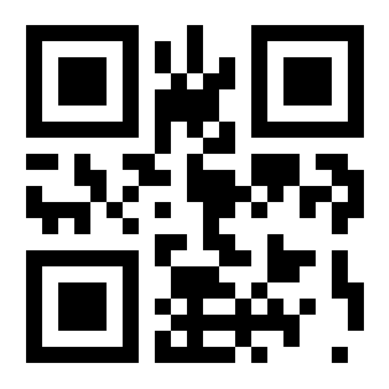

In [22]:
image = check_rotation(image)
image = cv2.rotate(image, cv2.ROTATE_180)
plot(image)

Issue: Rotated 180 degrees (Out of preprocessing scope)
Solution: ?????????
Status: Success
Text: LeffyBinaYaDonya

In [23]:
export_image(image, "./test_outputs/image3.jpg")

### Image 4 ###

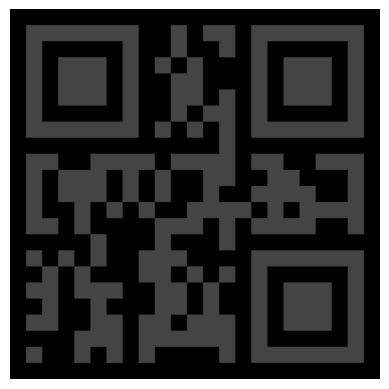

In [24]:
image = images[3]
plot(image)

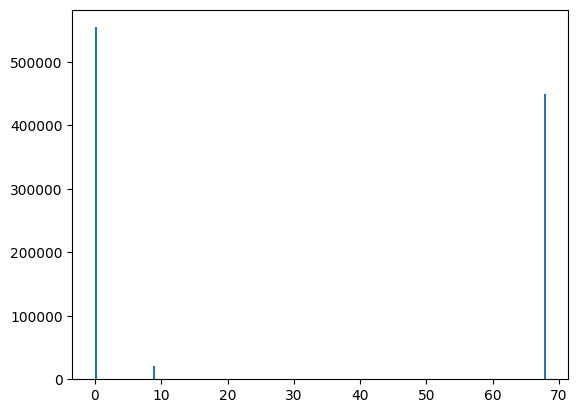

In [25]:
plt.hist(image.ravel(), bins=256);

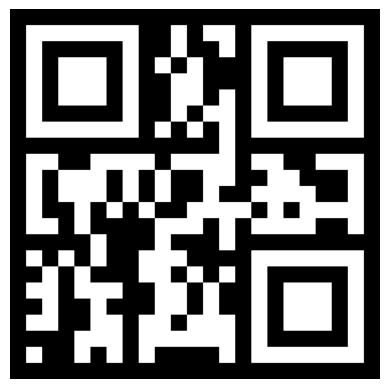

In [26]:
_, image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plot(image)

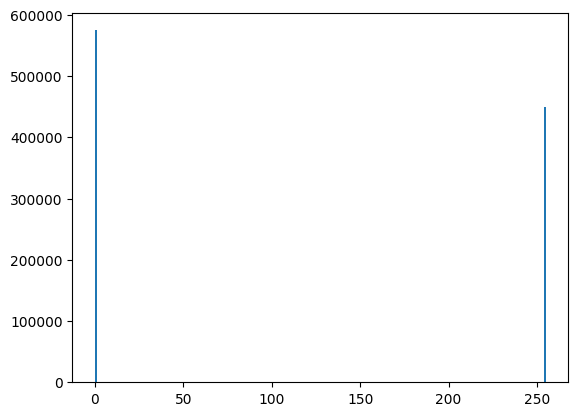

In [27]:
plt.hist(image.ravel(), bins=256);

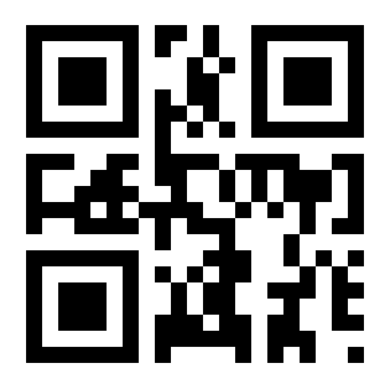

In [28]:
# Check the top left pixel, if it is black then invert the image
image = check_mirror(image)
image = check_rotation(image)
image = cv2.flip(image, 1)
plot(image)

Issue: White and Black are swapped + Mirror + White intensity is low
Solution: Thresholding for white intensity, check the color of the quiet zone for swapping, mirror vertically for mirroring
Status: Success
Text: Black mirror hehe

In [29]:
export_image(image, "./test_outputs/image4.jpg")

### Image 5 ###

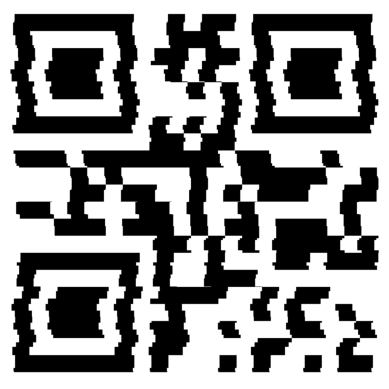

In [151]:
image_5 = cv2.cvtColor(cv2.imread("./test-cases/05-Caesar-cipher.png"), cv2.COLOR_BGR2GRAY)
plot(image_5)

In [152]:
np.unique(image_5)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

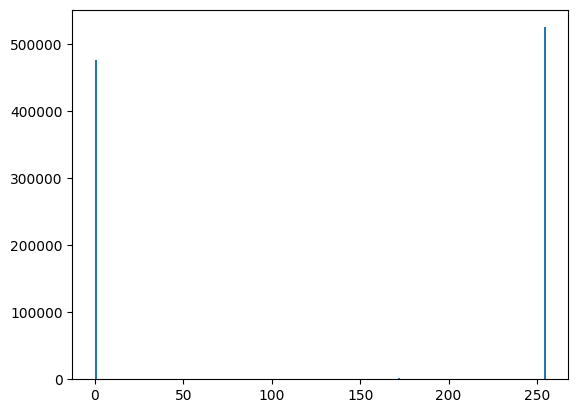

In [153]:
plt.hist(image_5.ravel(), bins=256);

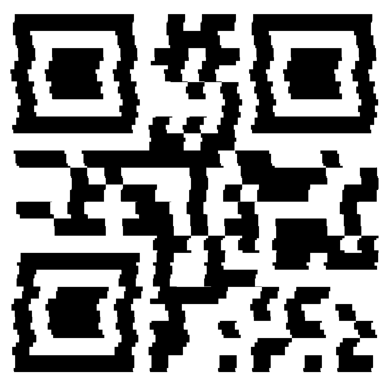

In [154]:
_, image_5_thresholded = cv2.threshold(image_5, 127, 255, cv2.THRESH_BINARY)
plot(image_5_thresholded)

In [155]:
np.unique(image_5_thresholded)

array([  0, 255], dtype=uint8)

In [274]:
counts = calculate_shift(image_5_thresholded)

In [277]:
regions_array = e7seb_shift(30, counts)
regions_array
        

[(0, 340),
 (340, 387),
 (387, 434),
 (434, 527),
 (527, 573),
 (573, 620),
 (620, 667),
 (667, 993),
 (993, 994),
 (994, 995),
 (995, 996),
 (996, 997),
 (997, 998),
 (998, 999),
 (999, 1000),
 (1000, 1001),
 (1001, 1002),
 (1002, 1003),
 (1003, 1004),
 (1004, 1005),
 (1005, 1006),
 (1006, 1007),
 (1007, 1008),
 (1008, 1009),
 (1009, 1010),
 (1010, 1011)]

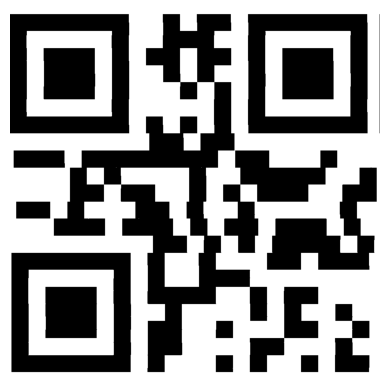

In [278]:
#enzel hena
image_5_thresholded_shifted = za7za7ni(image_5_thresholded, regions_array, counts)

plot(image_5_thresholded_shifted)



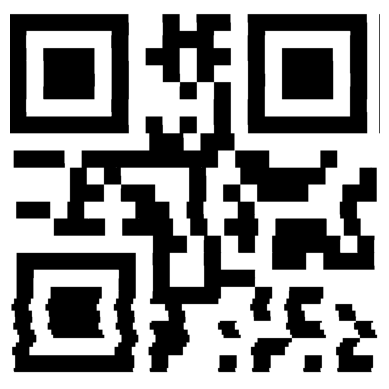

In [236]:
counts = calculate_shift(image_5_thresholded_shifted)
regions_array = e7seb_shift(15, counts)
image_5_thresholded_shifted_twice = za7za7ni(image_5_thresholded_shifted, regions_array, counts)
plot(image_5_thresholded_shifted_twice)

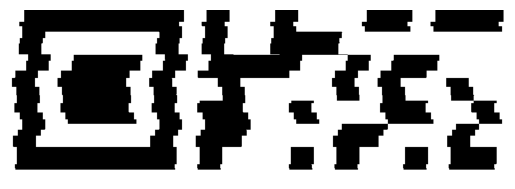

In [249]:
plot(image_5_thresholded[667:, :])

In [250]:
counts_for_bottom_half = calculate_shift(image_5_thresholded[667:])
counts_for_bottom_half

[29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,

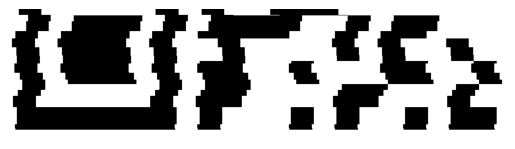

In [255]:
region_for_bottom_half = e7seb_shift(100, counts_for_bottom_half)
bottom_half_of_image_5 = za7za7ni(image_5_thresholded[667:], region_for_bottom_half, counts_for_bottom_half)
plot(bottom_half_of_image_5[80:])

In [208]:
# counts_for_bottom_bottom_half = calculate_shift(bottom_half_of_image_5[80:])
calculate_shift(bottom_half_of_image_5[80:])

[18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,


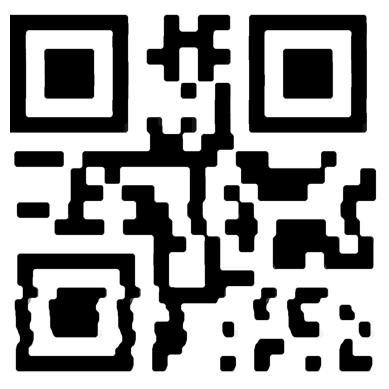

In [147]:
img = image_5

filter = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])


se_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 25))
image5_close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, se_rect)
blurred_image_5 = cv2.medianBlur(image5_close, 9)
se_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
image5_dilated = cv2.dilate(blurred_image_5, se_rect, 1)
image5_open = cv2.morphologyEx(image5_dilated, cv2.MORPH_OPEN, se_rect)

image5_sharpened = cv2.filter2D(image5_open, -1, filter)


for _ in range(8):
    blurred_image_5 = cv2.medianBlur(image5_sharpened, 9)


image5_sharpened = cv2.filter2D(blurred_image_5, -1, filter)
plot(image5_sharpened)

In [160]:
counts = calculate_shift(image_5_thresholded_shifted)
counts

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0

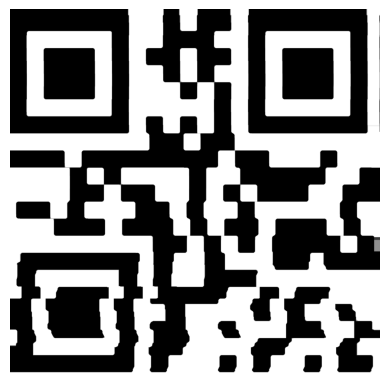

In [39]:
# Apply median filter
image_5 = cv2.medianBlur(image_5, 9)
# Apply opening
kernel = np.ones((31, 31), np.uint8)
image_5 = cv2.morphologyEx(image_5, cv2.MORPH_OPEN, kernel)
plot(image_5)

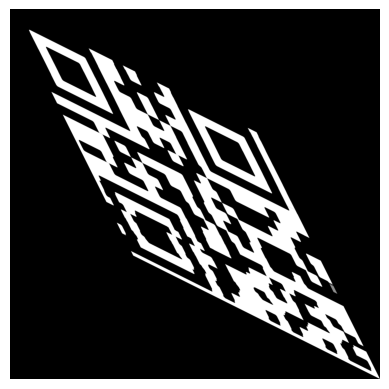

In [40]:
shear_amount = 0.5
M = np.float32([[1, shear_amount, 0],
             [shear_amount, 1, 0],
             [0, 0, 1]])

rows, cols = image_5.shape

image_5_sheared = cv2.warpPerspective(image_5, M, (int(cols*1.5), int(rows*1.5)))

plot(image_5_sheared)

in terms of shearing we have shearing, in terms of progress we have none

<img src="https://i.imgflip.com/8n8ssh.jpg" title="made at imgflip.com"/>

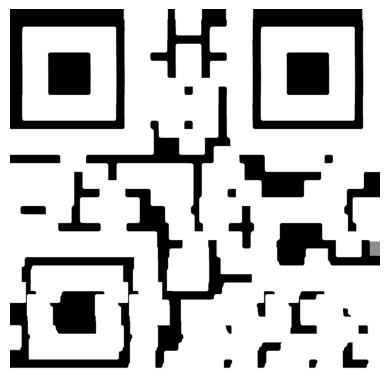

In [41]:
image_5_dilated = more_white(image_5, (25, 25), 1)
plot(image_5_dilated)

In [42]:
export_image(image, "./test_outputs/image5.jpg")

Issue: Edges are distorted
Solution: ?????????
Status: Fail
Text: |rxwx1eh2

### Image 6 ###

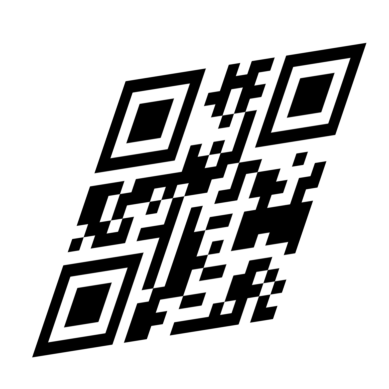

In [43]:
image_6 = images[5]
plot(image_6)

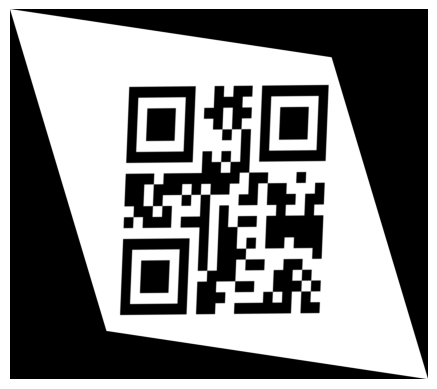

In [44]:
shear_amount_x = 0.3
shear_amount_y = 0.15
M = np.float32([[1, shear_amount_x, 0],
             [shear_amount_y, 1, 0],
             [0, 0, 1]])

rows, cols = image_5.shape

image_6_sheared = cv2.warpPerspective(image_6, M, (int(cols*1.3), int(rows*1.15)))

plot(image_6_sheared)

Issue: Needs reshaping
Solution: ?????????
Status: Fail
Text: dwXQ49gcwWQ

### Image 7 ###

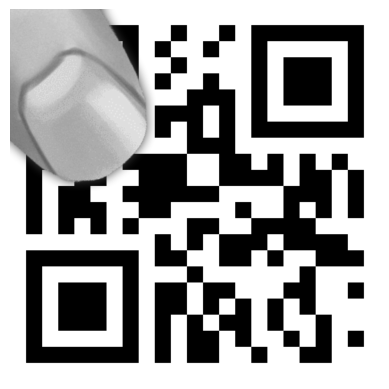

In [45]:
image = images[6]
plot(image)

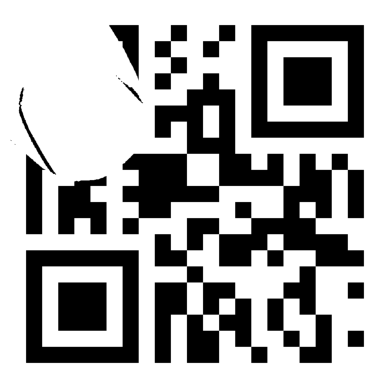

In [46]:
# plt.hist(image.ravel(), bins=256);
# Whiten any bins in the histogram that has lower pixels than 20000
_, image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plot(image)

Issue: Noise in the image
Solution: ?????????
Status: Fail
Text: ?????????

### Image 8 ###

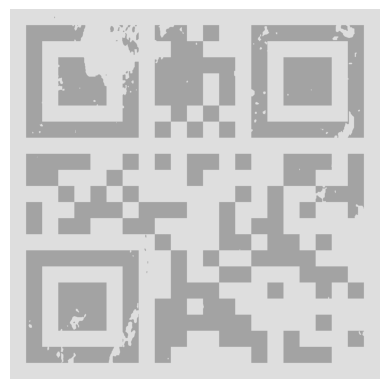

In [47]:
image = images[7]
plot(image)

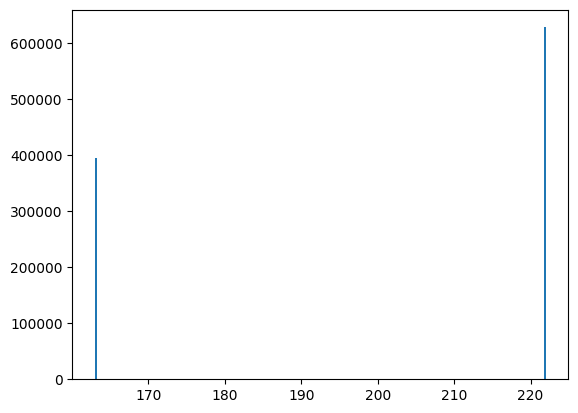

In [48]:
plt.hist(image.ravel(), bins=256);

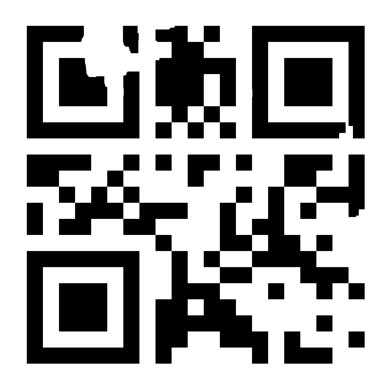

In [49]:
image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
se_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 20))
image = cv2.morphologyEx(image, cv2.MORPH_OPEN, se_rect)
image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, se_rect)
plot(image)

In [50]:
export_image(image, "./test_outputs/image8.jpg")

Issue: Colors are not solid, black pixels missing
Solution: Thresholding to convert into solid black and white, opening then closing to restore black pixels
Status: Fail
Text: ?????????

# First Half done, The second half needs to be added in the same way

# Image 9

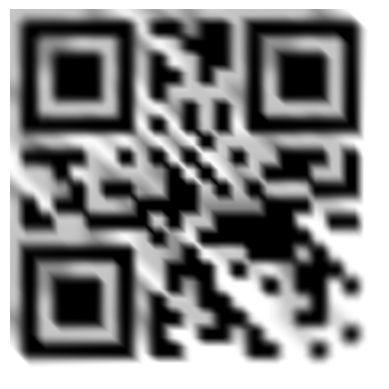

In [51]:
image_9 = images[8]
plot(image_9)

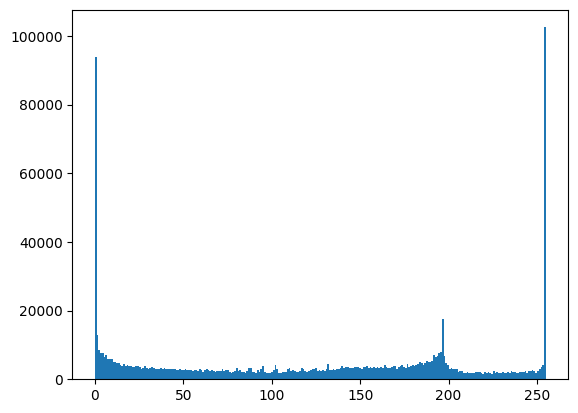

In [52]:
plt.hist(image_9.ravel(), bins=256);

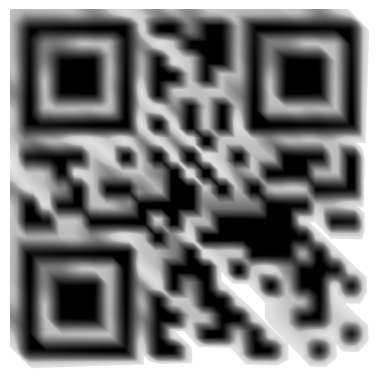

In [53]:
image_9_equalized = cv2.equalizeHist(image_9)
plot(image_9_equalized)

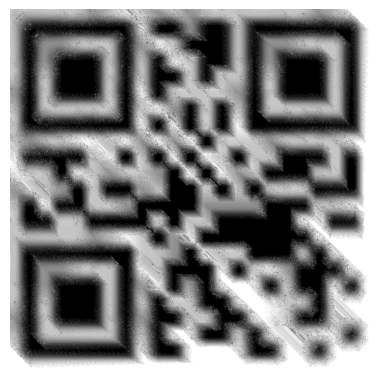

In [54]:
image_9_sharpened = sharpen(image_9, 3)
plot(image_9_sharpened)

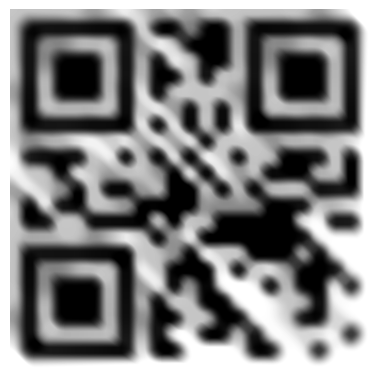

In [55]:
image_9_median_filter = cv2.medianBlur(image_9, 31)
plot(image_9_median_filter)

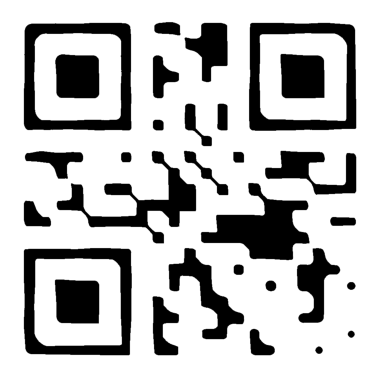

In [56]:
_, image_9_thresholded = cv2.threshold(image_9, 40, 255, cv2.THRESH_BINARY)
plot(image_9_thresholded)

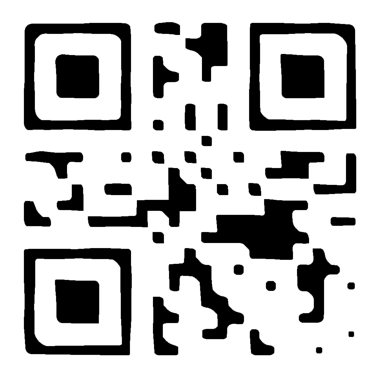

In [57]:
image_9_thresholded_closed = afeli_ya_warda(image_9_thresholded, (11, 11), 1)
plot(image_9_thresholded_closed)

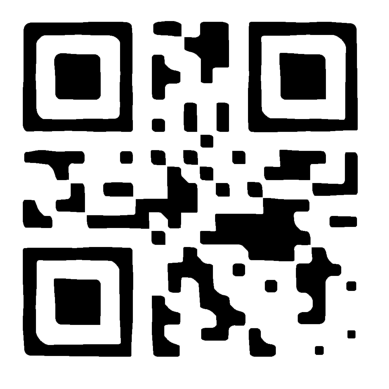

In [58]:
image_9_thresholded_closed_eroded = more_black(image_9_thresholded_closed, (8,8))
plot(image_9_thresholded_closed_eroded)

i don't know how to make it better ;-;

Issue: image blurred to oblivion Soltion: threshold

# Image 10

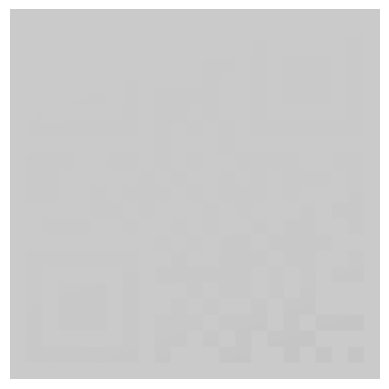

In [59]:
image_10 = images[9]
plot(image_10)

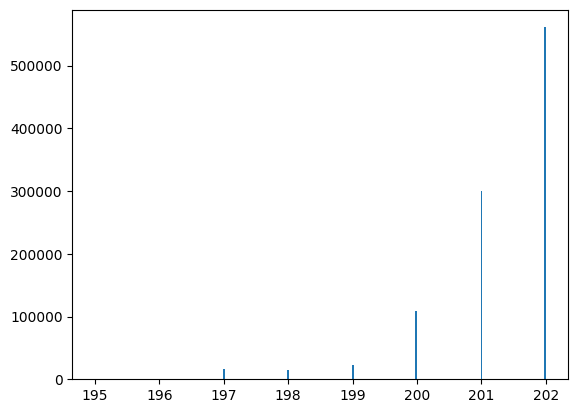

In [60]:
plt.hist(image_10.ravel(), bins=256);

In [61]:
np.unique(image_10)

array([195, 196, 197, 198, 199, 200, 201, 202], dtype=uint8)

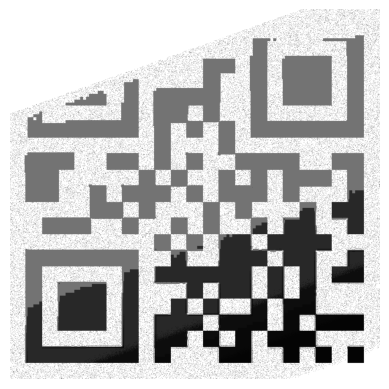

In [62]:
image_10_equalized = cv2.equalizeHist(image_10)
plot(image_10_equalized)

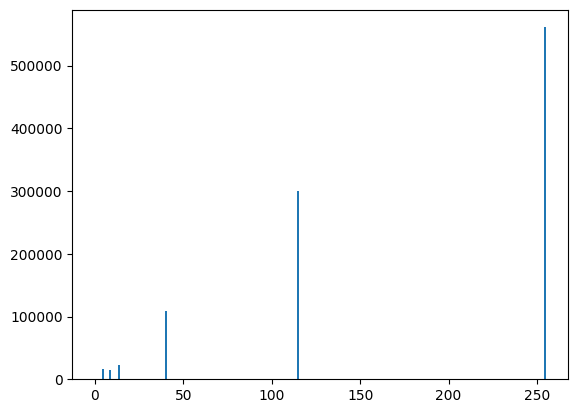

In [63]:
plt.hist(image_10_equalized.ravel(), bins=256);

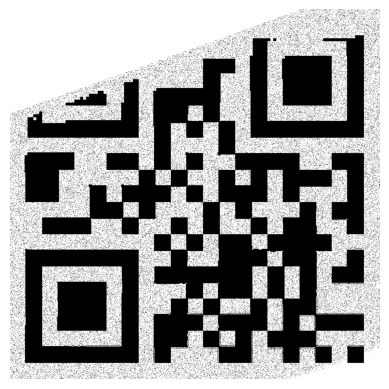

In [64]:
_, image_10_equalized_thresholded = cv2.threshold(image_10_equalized, 127, 255, cv2.THRESH_BINARY)
plot(image_10_equalized_thresholded)

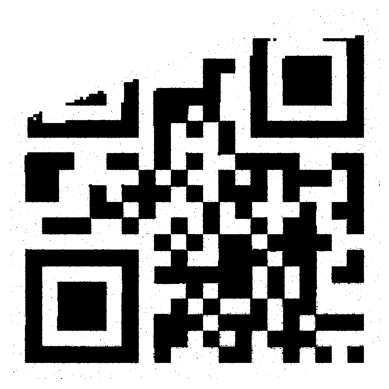

In [65]:
image_10_equalized_thresholded_median_blurred = cv2.medianBlur(image_10_equalized_thresholded, 3)
plot(image_10_equalized_thresholded_median_blurred)

problem? histogram LEFT SKEWED solution? equalize threshold then blur :)

# Image 11

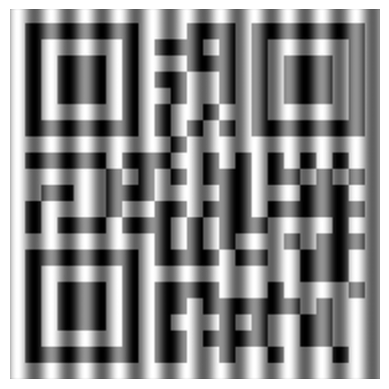

In [66]:
image_11 = images[10]
plot(image_11)

Low pass filters doesn't work
High pass filters is basically edge detection without the DC component and is not useful with DC either
Solution? Notch filters or band pass filters is the way to go, now i don't really understand how notch filters work so we will go with bandpass :D

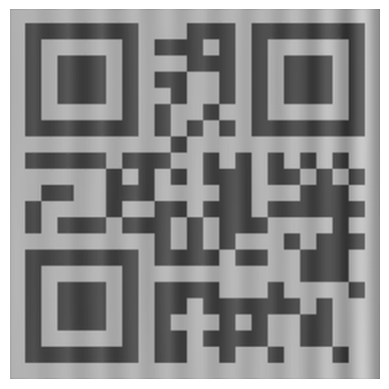

In [67]:
notch_filter = notch_reject_filter(image_11.shape, 1, 0, 10)
dft_image_11 = np.fft.fft2(image_11)
dft_image_shift = np.fft.fftshift(dft_image_11)

dft_image_shift_with_rejected_frequencies = dft_image_shift * notch_filter
image_12_rejected_sad_face= np.abs(np.fft.ifft2(dft_image_shift_with_rejected_frequencies))
plot(image_12_rejected_sad_face)
 

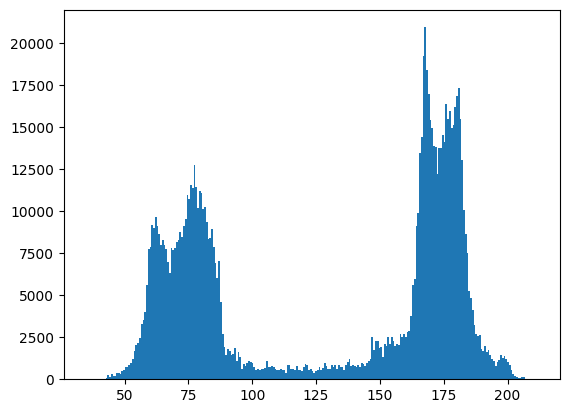

In [68]:
plt.hist(image_12_rejected_sad_face.ravel(), bins=256);

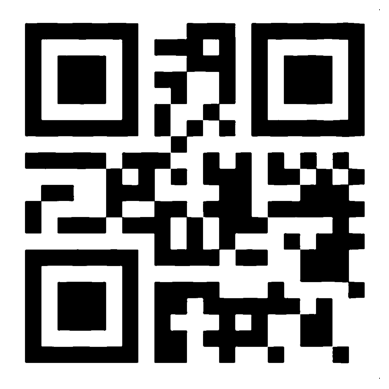

In [69]:
_ , image_12_rejected_sad_face_thresholded = cv2.threshold(image_12_rejected_sad_face, 127, 255, cv2.THRESH_BINARY)
plot(image_12_rejected_sad_face_thresholded) 

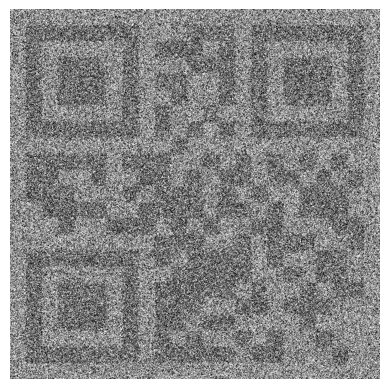

In [70]:
image_12 = images[11]
plot(image_12)

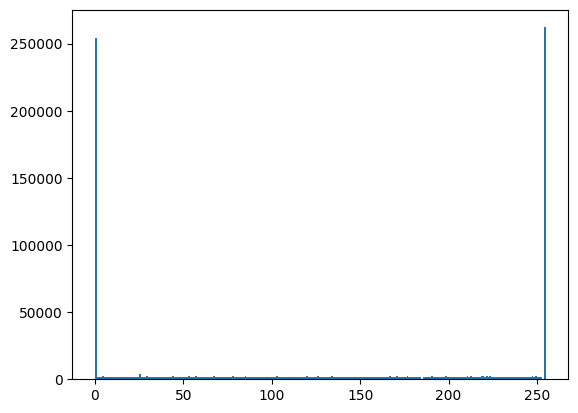

In [71]:
plt.hist(image_12.ravel(), bins=256);

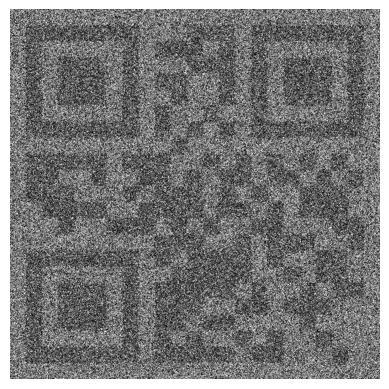

In [72]:
image_12_equalized = cv2.equalizeHist(image_12)
plot(image_12_equalized)

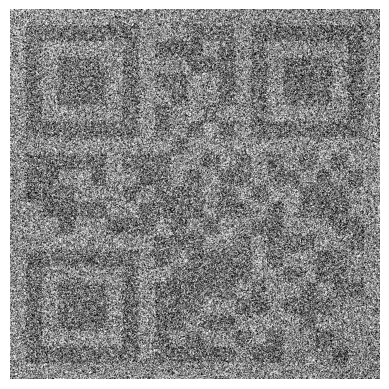

In [73]:
# _, image_11_thresholded = cv2.threshold(image_11, 127, 255, cv2.THRESH_BINARY)
image_12_thresholded = cv2.adaptiveThreshold(image_12, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,1501,1)
plot(image_12_thresholded)

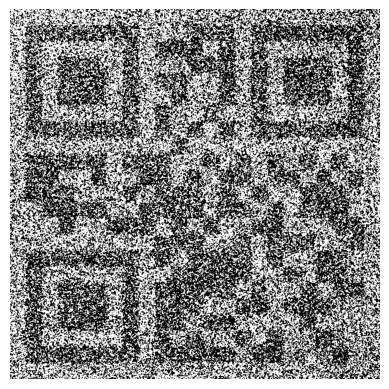

In [74]:
image_12_thresholded_median_blurred = cv2.medianBlur(image_12_thresholded, 3, 5)
plot(image_12_thresholded_median_blurred)

In [75]:
# plt.hist(image_12_thresholded_median_blurred.ravel(), bins=256);
np.unique(image_12_thresholded_median_blurred)

array([  0, 255], dtype=uint8)

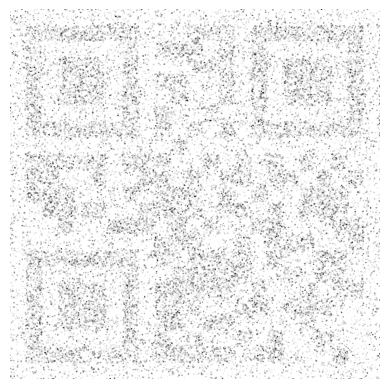

In [76]:
image_12_closed = afeli_ya_warda(image_12, (3,3), 1)
plot(image_12_closed)

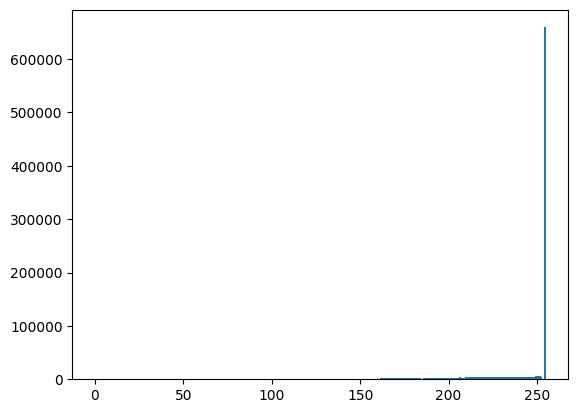

In [77]:
plt.hist(image_12_closed.ravel(), bins=256);

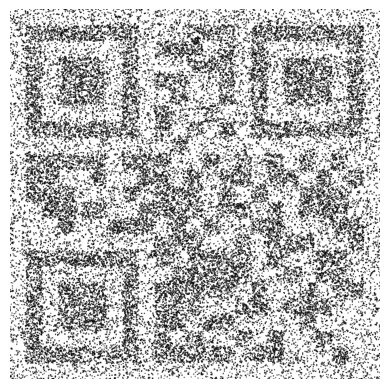

In [78]:
image_12_closed_equalized = cv2.equalizeHist(image_12_closed)
plot(image_12_closed_equalized)

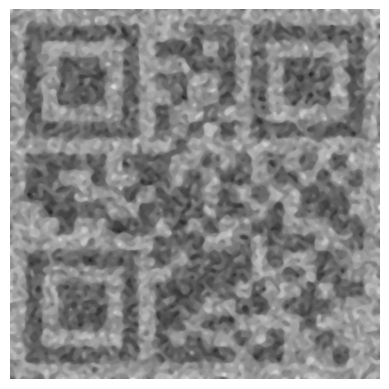

In [79]:
image_12_blurred = cv2.medianBlur(image_12, 9)
for _ in range(4):
    image_12_blurred = cv2.medianBlur(image_12_blurred, 9)
plot(image_12_blurred)

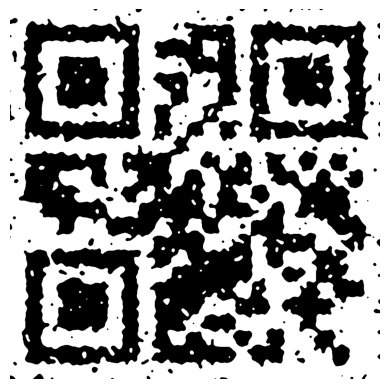

In [80]:
_, image_12_blurred_thresholded = cv2.threshold(image_12_blurred, 125,255, cv2.THRESH_BINARY)
plot(image_12_blurred_thresholded)

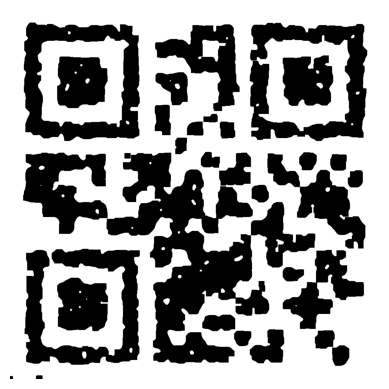

In [81]:
image_12_blurred_thresholded_closed = afeli_ya_warda(image_12_blurred_thresholded, (15, 15), 1)
plot(image_12_blurred_thresholded_closed)

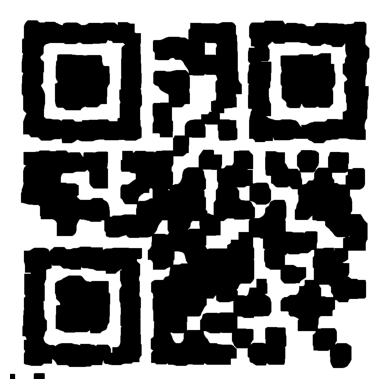

In [82]:
image_12_blurred_thresholded_closed_eroded = more_black(image_12_blurred_thresholded_closed, (5, 5), 3)
plot(image_12_blurred_thresholded_closed_eroded)

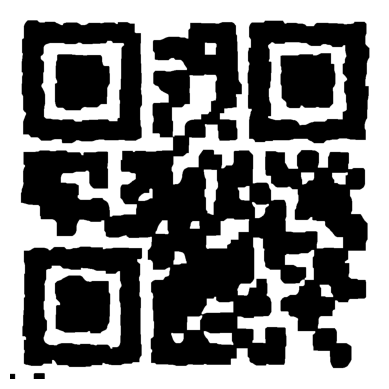

In [83]:
image_12_blurred_thresholded_closed_eroded_opened = fata7i_ya_warda(image_12_blurred_thresholded_closed_eroded, (5, 5), 1)
plot(image_12_blurred_thresholded_closed_eroded_opened)

# Image 13

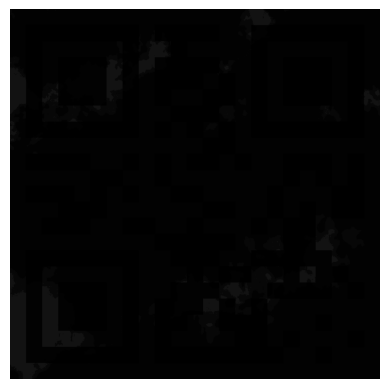

In [84]:
image_13 = images[12]
plot(image_13)

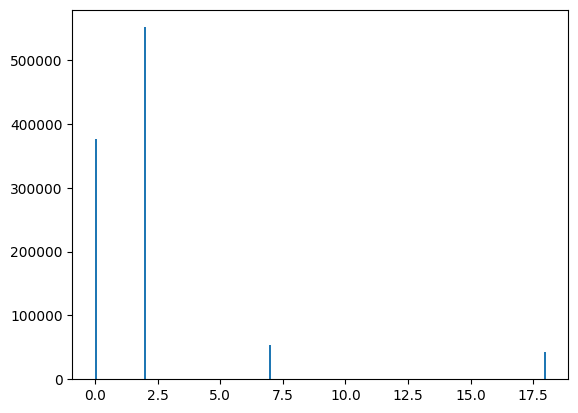

In [85]:
plt.hist(image_13.ravel(), bins=256);

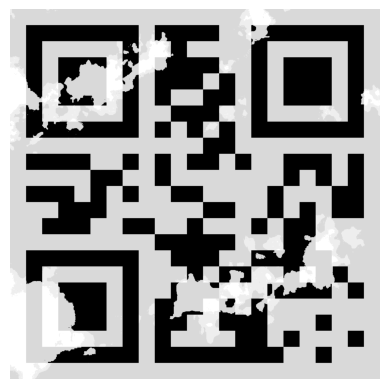

In [86]:
image_13_equalized = cv2.equalizeHist(image_13)
plot(image_13_equalized)

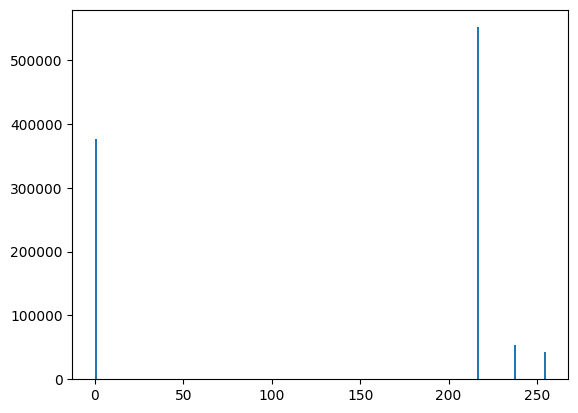

In [87]:
plt.hist(image_13_equalized.ravel(), bins=256);

In [88]:
np.unique(image_13_equalized)

array([  0, 217, 238, 255], dtype=uint8)

Issue: histogram RIGHT SKEWED Solution: equalize then ?????

# Image 14

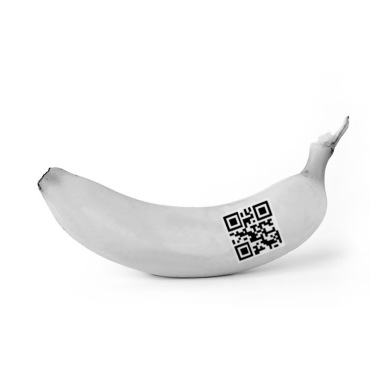

In [89]:
image_14 = images[13]
plot(image_14)

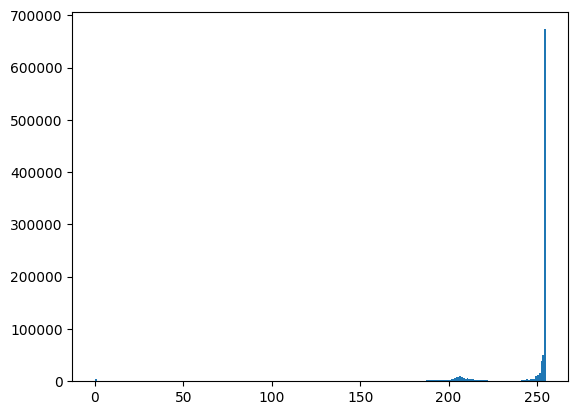

In [90]:
plt.hist(image_14.ravel(), bins=256);

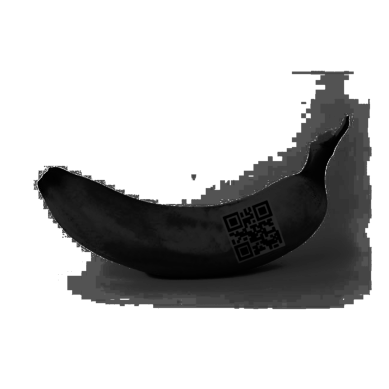

In [91]:
image_14_equalized = cv2.equalizeHist(image_14)
plot(image_14_equalized)

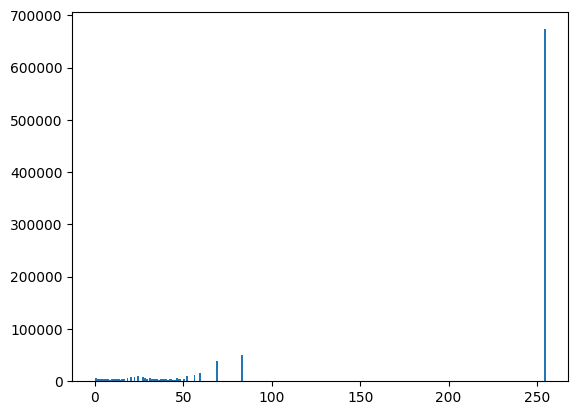

In [92]:
plt.hist(image_14_equalized.ravel(), bins=256);

In [93]:
np.unique(image_14_equalized)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  18,  20,  22,  24,  27,  28,  29,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  50,  52,  56,  59,  69,  83, 255], dtype=uint8)

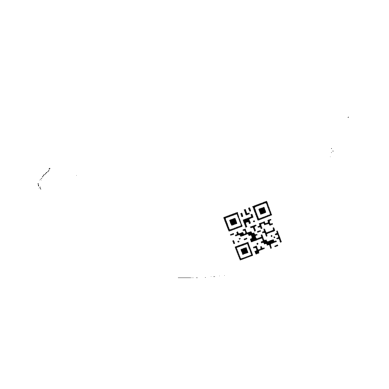

In [94]:
_, image_14_equalized_thresholded = cv2.threshold(image_14_equalized, 0, 255, cv2.THRESH_BINARY)
plot(image_14_equalized_thresholded)

Need to extract QR first, since the pipeline will first detect it as a problem with histogram i think, if QR is extracted then no problemo here, how to detect? idk lol

Issue: banana Soltion: banana

# Image 15

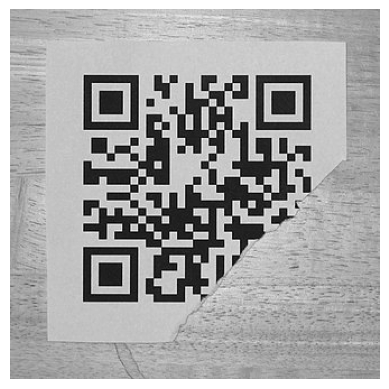

In [95]:
image_15 = images[14]
plot(image_15)

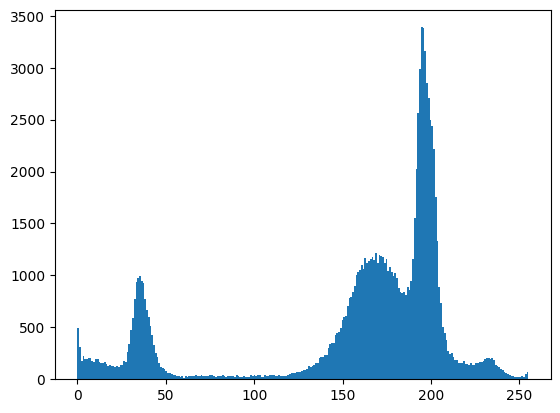

In [96]:
plt.hist(image_15.ravel(), bins=256);

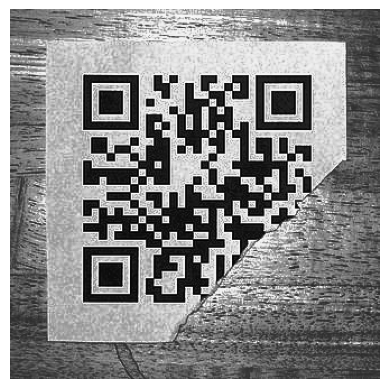

In [97]:
image_15_equlized = cv2.equalizeHist(image_15)
plot(image_15_equlized)

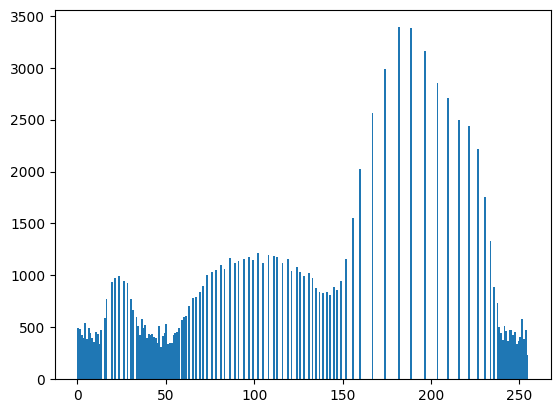

In [98]:
plt.hist(image_15_equlized.ravel(), bins=256);

nah don't equalize this one

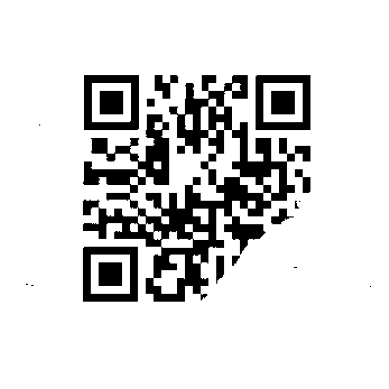

In [99]:
_, image_15_thresholded = cv2.threshold(image_15, 95, 255, cv2.THRESH_BINARY)
plot(image_15_thresholded)

threshold i guess
Issue: no issue just some background Soltion: threshold and maybe some more processing to improve

# Image 16

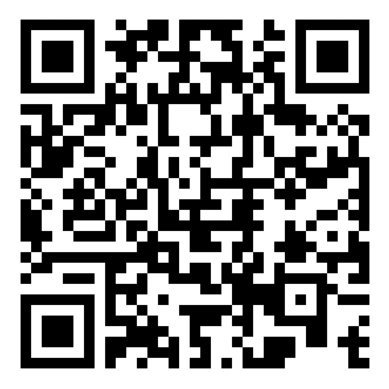

In [100]:
image_16 = images[15]
plot(image_16)

no problemo just V3